0    8607
5     768
6     735
1     118
3      92
4      69
2      60
Name: label, dtype: int64
(10449, 142)
Epoch 1/60
700/700 [==============================] - 1s 775us/step - loss: 0.3103 - accuracy: 0.9193
Epoch 2/60
700/700 [==============================] - 1s 785us/step - loss: 0.1330 - accuracy: 0.9724
Epoch 3/60
700/700 [==============================] - 1s 774us/step - loss: 0.1029 - accuracy: 0.9790
Epoch 4/60
700/700 [==============================] - 1s 780us/step - loss: 0.0987 - accuracy: 0.9796
Epoch 5/60
700/700 [==============================] - 1s 789us/step - loss: 0.0953 - accuracy: 0.9799
Epoch 6/60
700/700 [==============================] - 1s 777us/step - loss: 0.0961 - accuracy: 0.9799
Epoch 7/60
700/700 [==============================] - 1s 786us/step - loss: 0.0956 - accuracy: 0.9799
Epoch 8/60
700/700 [==============================] - 1s 760us/step - loss: 0.1042 - accuracy: 0.9769
Epoch 9/60
700/700 [==============================] - 1s 789us/step - loss:

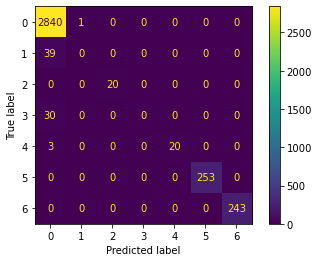

In [356]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from tensorflow.keras.layers import Dropout
# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt
import seaborn as sns 
# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split



d=pd.read_csv("labeled_packets.csv")
d.drop(columns=["Unnamed: 0"],inplace=True)
print(d.label.value_counts())

packets_dum=pd.get_dummies(d, columns=[ 'msg_type', 'iface_ver', 'proto_ver', 'retcode',
       'ip_src', 'ip_dst', 'proto', 'sport', 'dport', 'mac_src', 'mac_dst',
       'service_id', 'method_id', 'Type', 'timesensitive','Client_id', 'client_mac', 'client_ip',
       'client_send_port', 'client_rec_port', 'server_mac', 'server_ip',
       'server_send_port', 'server_rec_port'])


packets_dum.drop(columns=["iface_ver_3",
"retcode_10",
"ip_src_10.1.0.9",
"mac_src_02:9b:bb:bb:bb:bb"],inplace=True)

packets_dum["Label"]=packets_dum["label"]

packets_dum.drop(columns="label",inplace=True)
packets_dum.head()

X=packets_dum.iloc[:,0:-1]
y=packets_dum.iloc[:,-1]

X=X.astype(float)
X=X.to_numpy()
y=y.astype(int)
y=y.to_numpy()

print(X.shape)


from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder=LabelEncoder()
encoder.fit(y)
encoded_y=encoder.transform(y)
dummy_y=np_utils.to_categorical(encoded_y)
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.33, random_state=42,stratify=y)
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(142)))
model.add(tf.keras.layers.Dense(85, activation='tanh'))
model.add(tf.keras.layers.Dense(80, activation='relu'))
model.add(tf.keras.layers.Dense(7,activation="softmax"))



model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Fit the model
history=model.fit(X_train, y_train, epochs=60   , batch_size=10)

l=[]
for i in y_test:
    l.append(np.argmax(i))
k=np.array(l)

# Multiclass
y_pred = model.predict_classes(X_test)
cm=confusion_matrix(k, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 



In [166]:
packets_dum

,session_id,length,client_min,client_max,client_resendMin,client_resendMax,errorRate,server_min,server_max,msg_type_0,...,server_ip_10.0.0.1,server_ip_10.0.0.2,server_ip_10.0.0.3,server_ip_10.0.0.4,server_ip_10.0.0.6,server_ip_10.0.0.7,server_ip_10.0.0.8,server_send_port_30491,server_rec_port_30491,Label
0,1,28,1.0,10.0,2,3,0.2,1,5,1,...,0,1,0,0,0,0,0,1,1,0
1,1,23,1.0,10.0,2,3,0.2,1,5,0,...,0,1,0,0,0,0,0,1,1,0
2,2,10,1.0,10.0,2,3,0.2,1,5,1,...,0,1,0,0,0,0,0,1,1,0
3,2,8,1.0,10.0,2,3,0.2,1,5,0,...,0,1,0,0,0,0,0,1,1,0
4,3,11,1.0,10.0,2,3,0.2,1,5,1,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,7,11,1.0,10.0,2,3,0.3,1,5,0,...,0,0,0,0,0,0,1,1,1,0
10445,8,21,1.0,10.0,2,3,0.3,1,5,1,...,0,0,0,0,0,0,1,1,1,0
10446,8,20,1.0,10.0,2,3,0.3,1,5,0,...,0,0,0,0,0,0,1,1,1,0
10447,9,16,1.0,10.0,2,3,0.3,1,5,1,...,0,0,0,0,0,0,1,1,1,0


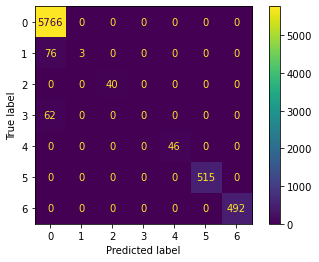

In [165]:
l=[]
for i in y_train:
    l.append(np.argmax(i))
k=np.array(l)

# Multiclass
y_pred = model.predict_classes(X_train)
cm=confusion_matrix(k, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 


In [158]:
np.unique(dummy_y)

array([0., 1.], dtype=float32)

In [159]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6])

In [106]:
d.columns

Index(['msg_type', 'session_id', 'iface_ver', 'length', 'proto_ver', 'retcode',
       'ip_src', 'ip_dst', 'proto', 'sport', 'dport', 'mac_src', 'mac_dst',
       'service_id', 'method_id', 'Type', 'timesensitive', 'client_min',
       'client_max', 'client_resendMin', 'client_resendMax', 'errorRate',
       'server_min', 'server_max', 'Client_id', 'client_mac', 'client_ip',
       'client_send_port', 'client_rec_port', 'server_mac', 'server_ip',
       'server_send_port', 'server_rec_port', 'label'],
      dtype='object')

In [138]:
d1["proto"]

0        17
1        17
2        17
3        17
4        17
         ..
10444    17
10445    17
10446    17
10447    17
10448    17
Name: proto, Length: 10449, dtype: int64

In [131]:
X.shape

(10449, 96)

(10449, 96)
Epoch 1/30
700/700 [==============================] - 1s 1ms/step - loss: 0.3547 - accuracy: 0.9107 - val_loss: 0.2051 - val_accuracy: 0.9652
Epoch 2/30
700/700 [==============================] - 1s 899us/step - loss: 0.1658 - accuracy: 0.9670 - val_loss: 0.1365 - val_accuracy: 0.9725
Epoch 3/30
700/700 [==============================] - 1s 944us/step - loss: 0.1260 - accuracy: 0.9740 - val_loss: 0.1214 - val_accuracy: 0.9774
Epoch 4/30
700/700 [==============================] - 1s 891us/step - loss: 0.1126 - accuracy: 0.9771 - val_loss: 0.1037 - val_accuracy: 0.9780
Epoch 5/30
700/700 [==============================] - 1s 876us/step - loss: 0.1033 - accuracy: 0.9787 - val_loss: 0.1023 - val_accuracy: 0.9783
Epoch 6/30
700/700 [==============================] - 1s 906us/step - loss: 0.1027 - accuracy: 0.9784 - val_loss: 0.1021 - val_accuracy: 0.9797
Epoch 7/30
700/700 [==============================] - 1s 879us/step - loss: 0.0995 - accuracy: 0.9791 - val_loss: 0.0999 - val

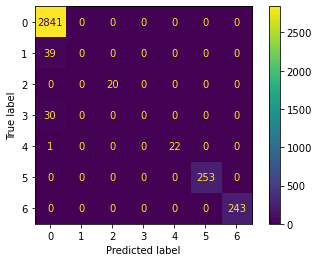

In [357]:
d1=d.drop(columns=['Type', 'timesensitive', 'client_min',
       'client_max', 'client_resendMin', 'client_resendMax', 'errorRate',
       'server_min', 'server_max', 'client_mac', 'client_ip',
       'client_send_port', 'client_rec_port', 'server_mac', 'server_ip',
       'server_send_port', 'server_rec_port'])

packets_dum=pd.get_dummies(d1, columns=[ 'msg_type', 'iface_ver', 'proto_ver', 'retcode',
       'ip_src', 'ip_dst', 'proto', 'sport', 'dport', 'mac_src', 'mac_dst',
       'service_id', 'method_id','Client_id'])


packets_dum.drop(columns=["iface_ver_3",
"retcode_10",
"ip_src_10.1.0.9",
"mac_src_02:9b:bb:bb:bb:bb"],inplace=True)

packets_dum["Label"]=packets_dum["label"]

packets_dum.drop(columns="label",inplace=True)
packets_dum.head()

X=packets_dum.iloc[:,0:-1]
y=packets_dum.iloc[:,-1]

X=X.astype(float)
X=X.to_numpy()
y=y.astype(int)
y=y.to_numpy()

print(X.shape)


from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder=LabelEncoder()
encoder.fit(y)
encoded_y=encoder.transform(y)
dummy_y=np_utils.to_categorical(encoded_y)
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.33, random_state=42,stratify=y)
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(96,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(7,activation="softmax"))



model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Fit the model
history=model.fit(X_train, y_train, epochs=30,batch_size=10,validation_data=(X_test,y_test))

l=[]
for i in y_test:
    l.append(np.argmax(i))
k=np.array(l)

# Multiclass
y_pred = model.predict_classes(X_test)
cm=confusion_matrix(k, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 


In [134]:
d1.corr()

,msg_type,session_id,iface_ver,length,proto_ver,retcode,proto,sport,dport,service_id,method_id,Client_id,label
msg_type,1.000000,0.043960,-0.209444,0.007653,NaN,0.357925,NaN,-0.985604,0.985604,0.036763,-0.141520,-0.017759,-0.283968
session_id,0.043960,1.000000,-0.299315,-0.013242,NaN,-0.007019,NaN,-0.045121,0.045121,-0.137371,0.015502,0.004204,-0.435990
iface_ver,-0.209444,-0.299315,1.000000,-0.013526,NaN,-0.074268,NaN,0.206490,-0.206490,-0.020617,0.028027,-0.033550,0.720743
length,0.007653,-0.013242,-0.013526,1.000000,NaN,0.003531,NaN,-0.006168,0.006168,0.001052,0.008597,0.002656,-0.002488
proto_ver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retcode,0.357925,-0.007019,-0.074268,0.003531,NaN,1.000000,NaN,-0.322201,0.322201,0.080160,-0.042568,0.033028,-0.062927
proto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sport,-0.985604,-0.045121,0.206490,-0.006168,NaN,-0.322201,NaN,1.000000,-1.000000,-0.032146,0.140539,0.020958,0.307195
dport,0.985604,0.045121,-0.206490,0.006168,NaN,0.322201,NaN,-1.000000,1.000000,0.032146,-0.140539,-0.020958,-0.307195
service_id,0.036763,-0.137371,-0.020617,0.001052,NaN,0.080160,NaN,-0.032146,0.032146,1.000000,-0.444265,0.498956,-0.039171


In [133]:
packets_dum

,session_id,length,msg_type_0,msg_type_1,msg_type_2,msg_type_128,msg_type_129,iface_ver_1,proto_ver_1,retcode_0,...,method_id_4095,Client_id_1,Client_id_2,Client_id_3,Client_id_4,Client_id_5,Client_id_6,Client_id_7,Client_id_8,Label
0,1,28,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1,1,23,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
2,2,10,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3,2,8,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
4,3,11,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,7,11,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
10445,8,21,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
10446,8,20,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
10447,9,16,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0


# Cross Validation

TRAIN: [    0     2     3 ... 10443 10446 10447] TEST: [    1     9    18 ... 10444 10445 10448]
Epoch 1/8
279/279 [==============================] - 1s 2ms/step - loss: 0.5356 - accuracy: 0.8686
Epoch 2/8
279/279 [==============================] - 1s 2ms/step - loss: 0.1092 - accuracy: 0.9749
Epoch 3/8
279/279 [==============================] - 1s 2ms/step - loss: 0.0549 - accuracy: 0.9855
Epoch 4/8
279/279 [==============================] - 1s 2ms/step - loss: 0.0321 - accuracy: 0.9909
Epoch 5/8
279/279 [==============================] - 1s 2ms/step - loss: 0.0212 - accuracy: 0.9934
Epoch 6/8
279/279 [==============================] - 1s 2ms/step - loss: 0.0118 - accuracy: 0.9976
Epoch 7/8
279/279 [==============================] - 1s 2ms/step - loss: 0.0058 - accuracy: 0.9998
Epoch 8/8
279/279 [==============================] - 1s 2ms/step - loss: 0.0035 - accuracy: 1.0000
TRAIN: [    0     1     3 ... 10446 10447 10448] TEST: [    2     4     8 ... 10422 10439 10442]
Epoch 1/8
279/

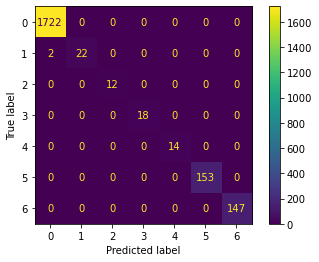

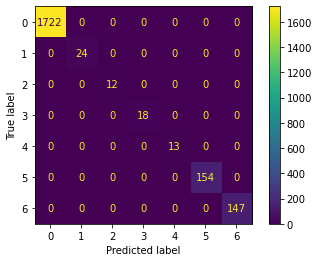

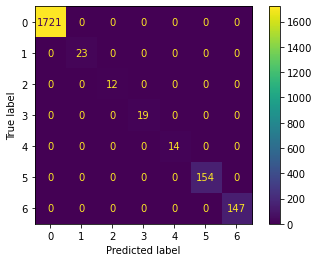

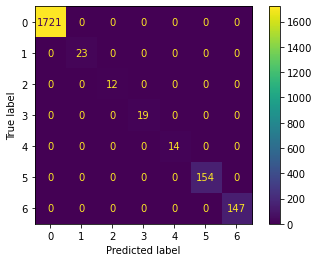

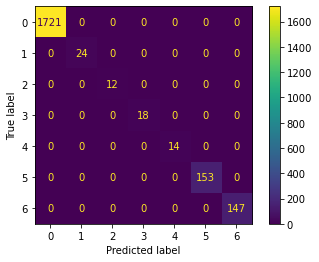

In [85]:
import random as rn


tf.random.set_seed(89)
rn.seed(1254)
np.random.seed(37)


from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,random_state=7,shuffle=True)
k=1
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = dummy_y[train_index], dummy_y[test_index]
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(142,)))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(7,activation="softmax"))
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    # Fit the model
    history=model.fit(X_train, y_train, epochs=8,batch_size=30)
    
    l=[]
    for i in y_test:
        l.append(np.argmax(i))
    k=np.array(l)

    # Multiclass
    y_pred = model.predict_classes(X_test)
    cm=confusion_matrix(k, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
    disp.plot() 
    
    
    

# Plot ROC curves for the multilabel problem

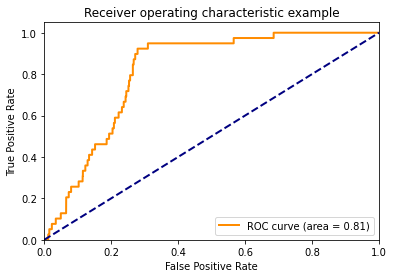

In [171]:
y_score=model.predict(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<ipython-input-172-81281a3972c7>:14: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


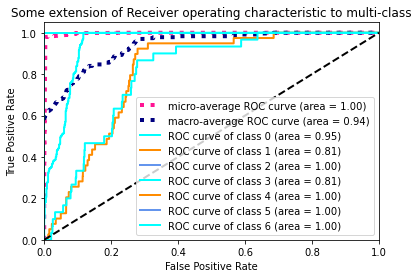

In [172]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

from scipy import interp
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(7)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(7):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 7

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Missing Response

In [360]:
d=pd.read_csv("missing_response.csv")
d.drop(columns=["Unnamed: 0"],inplace=True)
print(d.label.value_counts())

d1=d.drop(columns=['Type', 'timesensitive', 'client_min',
       'client_max', 'client_resendMin', 'client_resendMax', 'errorRate',
       'server_min', 'server_max', 'client_mac', 'client_ip',
       'client_send_port', 'client_rec_port', 'server_mac', 'server_ip',
       'server_send_port', 'server_rec_port'])

packets_dum=pd.get_dummies(d1, columns=[ 'msg_type', 'iface_ver', 'proto_ver', 'retcode',
       'ip_src', 'ip_dst', 'proto', 'sport', 'dport', 'mac_src', 'mac_dst',
       'service_id', 'method_id','Client_id'])


#packets_dum.drop(columns=["iface_ver_3","retcode_10","ip_src_10.1.0.9","mac_src_02:9b:bb:bb:bb:bb"],inplace=True)

packets_dum["Label"]=packets_dum["label"]

packets_dum.drop(columns="label",inplace=True)
packets_dum.head()

X=packets_dum.iloc[:,0:-1]
y=packets_dum.iloc[:,-1]

X=X.astype(float)
X=X.to_numpy()
y=y.astype(int)
y=y.to_numpy()

print(X.shape)


count=0
window=8
value=window-1
total=X.shape[0]

for i in range(total):
    if(i+value<total):
        count+=1
        
print(count)

d=np.zeros((count,window,X.shape[1]),dtype='float')
for i in range(d.shape[0]):
    d[i]=X[i:i+window].astype(float)
    
y1=np.zeros((count,1),dtype='uint8')
for i in range(d.shape[0]):
    y1[i]=y[i+window-1]

    



0    1262
3      92
Name: label, dtype: int64
(1354, 96)
1347


C:\Users\natashakhatib\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


TRAIN: [   1    3    4    5    6    7    8   11   13   15   16   18   19   21
   22   23   24   27   28   30   35   36   37   38   42   43   44   47
   48   49   50   53   56   58   59   62   63   64   65   66   67   69
   70   73   74   75   76   78   79   81   82   83   84   86   87   88
   89   91   92   93   95   96   97   98   99  101  102  103  105  107
  108  110  111  112  113  117  118  119  121  123  124  125  126  129
  130  131  133  134  135  136  137  138  142  144  146  148  150  151
  152  154  155  158  159  160  161  162  163  164  168  169  171  174
  175  176  179  180  181  182  183  185  186  187  188  191  194  195
  196  199  201  202  203  204  205  206  207  208  209  210  211  212
  213  216  217  218  220  222  225  228  229  230  232  233  235  237
  238  239  240  241  242  244  245  247  249  250  251  253  254  255
  257  258  259  260  261  262  263  265  266  267  268  269  270  271
  272  274  275  277  278  279  280  282  284  285  287  288  289  290

30/30 [==============================] - 0s 5ms/step - loss: 0.1767 - precision_64: 0.9376
Epoch 15/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1740 - precision_64: 0.9376
Epoch 16/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1493 - precision_64: 0.9443
Epoch 17/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1359 - precision_64: 0.9532
Epoch 18/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1393 - precision_64: 0.9454
Epoch 19/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1158 - precision_64: 0.9555
Epoch 20/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1100 - precision_64: 0.9610
TRAIN: [   0    2    3    4    5    6    9   10   11   12   14   17   20   25
   26   27   29   31   32   33   34   35   37   38   39   40   41   43
   44   45   46   48   49   50   51   52   53   54   55   56   57   60
   61   63   67   68   70   71   72   73   77   78   79   80   82   83


30/30 [==============================] - 0s 6ms/step - loss: 0.1996 - precision_65: 0.9321
Epoch 8/20
30/30 [==============================] - ETA: 0s - loss: 0.2071 - precision_65: 0.92 - 0s 5ms/step - loss: 0.2088 - precision_65: 0.9254
Epoch 9/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1807 - precision_65: 0.9343
Epoch 10/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1851 - precision_65: 0.9354
Epoch 11/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1717 - precision_65: 0.9321
Epoch 12/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1837 - precision_65: 0.9310
Epoch 13/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1751 - precision_65: 0.9343
Epoch 14/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1534 - precision_65: 0.9388
Epoch 15/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1511 - precision_65: 0.9399
Epoch 16/20
30/30 [======================

30/30 [==============================] - 0s 7ms/step - loss: 0.3046 - precision_66: 0.9176
Epoch 2/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2428 - precision_66: 0.9321
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2450 - precision_66: 0.9321
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2274 - precision_66: 0.9343
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2079 - precision_66: 0.9332
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2228 - precision_66: 0.9332
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2038 - precision_66: 0.9298
Epoch 8/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1982 - precision_66: 0.9298
Epoch 9/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1948 - precision_66: 0.9298
Epoch 10/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1814 - precision_6

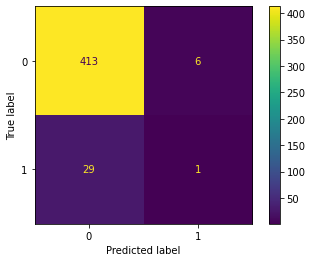

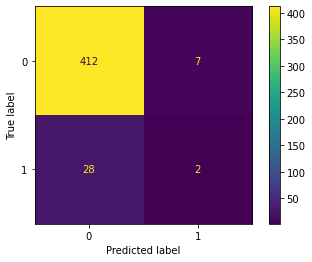

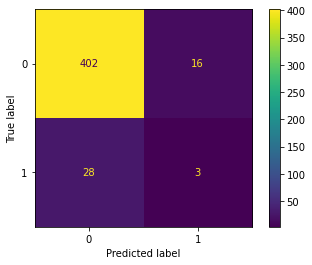

In [361]:
import random as rn


tf.random.set_seed(89)
rn.seed(1254)
np.random.seed(37)

encoder=LabelEncoder()
encoder.fit(y1)
encoded_y=encoder.transform(y1)
dummy_y=np_utils.to_categorical(encoded_y)


from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3,random_state=7,shuffle=True)
k=1
for train_index, test_index in skf.split(d, y1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = d[train_index], d[test_index]
    y_train, y_test = dummy_y[train_index], dummy_y[test_index]
    
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.SimpleRNN(256,input_shape=[d.shape[1],d.shape[2]],return_sequences=True))
    model.add(tf.keras.layers.Dropout(rate=0.3))
    model.add(tf.keras.layers.SimpleRNN(64))
    model.add(tf.keras.layers.Dense(2,activation="softmax"))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=[tf.keras.metrics.Precision()])
    model.fit(X_train,y_train,epochs=20,batch_size=30)
  
    l=[]
    for i in y_test:
        l.append(np.argmax(i))
    k=np.array(l)

    # Multiclass
    y_pred = model.predict_classes(X_test)
    cm=confusion_matrix(k, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
    disp.plot() 
    
    
    

C:\Users\natashakhatib\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Epoch 1/50
45/45 [==============================] - 0s 6ms/step - loss: 0.2820
Epoch 2/50
45/45 [==============================] - 0s 6ms/step - loss: 0.2373
Epoch 3/50
45/45 [==============================] - 0s 6ms/step - loss: 0.2309
Epoch 4/50
45/45 [==============================] - 0s 6ms/step - loss: 0.2203
Epoch 5/50
45/45 [==============================] - 0s 6ms/step - loss: 0.2066
Epoch 6/50
45/45 [==============================] - 0s 6ms/step - loss: 0.2140
Epoch 7/50
45/45 [==============================] - 0s 6ms/step - loss: 0.2054
Epoch 8/50
45/45 [==============================] - 0s 6ms/step - loss: 0.2052
Epoch 9/50
45/45 [==============================] - 0s 6ms/step - loss: 0.2082
Epoch 10/50
45/45 [==============================] - 0s 6ms/step - loss: 0.1978
Epoch 11/50
45/45 [==============================] - 0s 5ms/step - loss: 0.1954
Epoch 12/50
45/45 [==============================] - 0s 5ms/step - loss: 0.1863
Epoch 13/50
45/45 [==============================

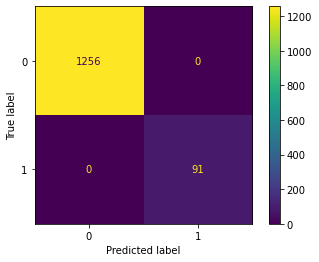

In [362]:
import random as rn 

encoder=LabelEncoder()
encoder.fit(y1)
encoded_y=encoder.transform(y1)
dummy_y=np_utils.to_categorical(encoded_y)

model=tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(256,input_shape=[d.shape[1],d.shape[2]],return_sequences=True))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.SimpleRNN(64))
model.add(tf.keras.layers.Dense(2,activation="softmax"))
model.compile(loss='categorical_crossentropy',optimizer='adam')
model.fit(d,dummy_y,epochs=50,batch_size=30)

l=[]
for i in dummy_y:
    l.append(np.argmax(i))
k=np.array(l)

# Multiclass
y_pred = model.predict_classes(d)
cm=confusion_matrix(k, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 

In [452]:
d=pd.read_csv("missing_response_test.csv")
d.drop(columns=["Unnamed: 0"],inplace=True)
print(d.label.value_counts())

d1=d.drop(columns=['Type', 'timesensitive', 'client_min',
       'client_max', 'client_resendMin', 'client_resendMax', 'errorRate',
       'server_min', 'server_max', 'client_mac', 'client_ip',
       'client_send_port', 'client_rec_port', 'server_mac', 'server_ip',
       'server_send_port', 'server_rec_port'])

packets_dum=pd.get_dummies(d1, columns=[ 'msg_type', 'iface_ver', 'proto_ver', 'retcode',
       'ip_src', 'ip_dst', 'proto', 'sport', 'dport', 'mac_src', 'mac_dst',
       'service_id', 'method_id','Client_id'])


#packets_dum.drop(columns=["iface_ver_3","retcode_10","ip_src_10.1.0.9","mac_src_02:9b:bb:bb:bb:bb"],inplace=True)

packets_dum["Label"]=packets_dum["label"]

packets_dum.drop(columns="label",inplace=True)
packets_dum.head()

X=packets_dum.iloc[:,0:-1]
y=packets_dum.iloc[:,-1]

X=X.astype(float)
X=X.to_numpy()
y=y.astype(int)
y=y.to_numpy()

print(X.shape)

count=0
window=8
value=window-1
total=X.shape[0]

for i in range(total):
    if(i+value<total):
        count+=1
        
print(count)

d1=np.zeros((count,window,X.shape[1]),dtype='float')
for i in range(d1.shape[0]):
    d1[i]=X[i:i+window].astype(float)
    
    
y2=np.zeros((count,1),dtype='uint8')
for i in range(d1.shape[0]):
    y2[i]=y[i+window-1]




0    1302
3      86
Name: label, dtype: int64
(1388, 96)
1381


In [453]:
encoder=LabelEncoder()
encoder.fit(y2)
encoded_y=encoder.transform(y2)
dummy_y=np_utils.to_categorical(encoded_y)


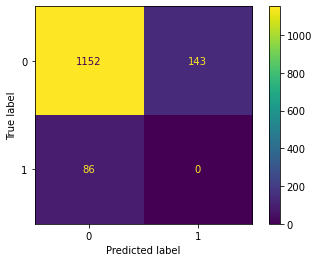

In [454]:
encoder=LabelEncoder()
encoder.fit(y2)
encoded_y=encoder.transform(y2)
dummy_y=np_utils.to_categorical(encoded_y)


l=[]
for i in dummy_y:
    l.append(np.argmax(i))
k=np.array(l)

# Multiclass
y_pred = model.predict_classes(d1)
cm=confusion_matrix(k, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 

In [658]:
d=pd.read_csv("missing_request.csv")
d.drop(columns=["Unnamed: 0"],inplace=True)
print(d.label.value_counts())

0    1266
1     118
Name: label, dtype: int64


In [659]:
d

,msg_type,session_id,iface_ver,length,proto_ver,retcode,ip_src,ip_dst,proto,sport,...,Client_id,client_mac,client_ip,client_send_port,client_rec_port,server_mac,server_ip,server_send_port,server_rec_port,label
0,0,1,1,18,1,0,10.1.0.2,10.0.0.2,17,30501,...,2,02:2B:BB:BB:BB:BB,10.1.0.2,30501,30501,02:2A:AA:AA:AA:AA,10.0.0.2,30491,30491,0
1,0,1,1,25,1,0,10.1.0.4,10.0.0.2,17,30501,...,4,02:4B:BB:BB:BB:BB,10.1.0.4,30501,30501,02:2A:AA:AA:AA:AA,10.0.0.2,30491,30491,0
2,0,1,1,8,1,0,10.1.0.7,10.0.0.2,17,30501,...,7,02:7B:BB:BB:BB:BB,10.1.0.7,30501,30501,02:2A:AA:AA:AA:AA,10.0.0.2,30491,30491,0
3,0,2,1,21,1,0,10.1.0.2,10.0.0.2,17,30501,...,2,02:2B:BB:BB:BB:BB,10.1.0.2,30501,30501,02:2A:AA:AA:AA:AA,10.0.0.2,30491,30491,0
4,0,1,1,23,1,0,10.1.0.3,10.0.0.2,17,30501,...,3,02:3B:BB:BB:BB:BB,10.1.0.3,30501,30501,02:2A:AA:AA:AA:AA,10.0.0.2,30491,30491,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,128,7,1,14,1,0,10.0.0.2,10.1.0.4,17,30491,...,4,02:4B:BB:BB:BB:BB,10.1.0.4,30501,30501,02:2A:AA:AA:AA:AA,10.0.0.2,30491,30491,1
1380,0,8,1,22,1,0,10.1.0.4,10.0.0.2,17,30501,...,4,02:4B:BB:BB:BB:BB,10.1.0.4,30501,30501,02:2A:AA:AA:AA:AA,10.0.0.2,30491,30491,0
1381,128,8,1,23,1,0,10.0.0.2,10.1.0.4,17,30491,...,4,02:4B:BB:BB:BB:BB,10.1.0.4,30501,30501,02:2A:AA:AA:AA:AA,10.0.0.2,30491,30491,0
1382,0,44,1,8,1,0,10.1.0.4,10.0.0.2,17,30501,...,4,02:4B:BB:BB:BB:BB,10.1.0.4,30501,30501,02:2A:AA:AA:AA:AA,10.0.0.2,30491,30491,0


# Missing Request

In [660]:
d1=d.drop(columns=['Type', 'timesensitive', 'client_min',
       'client_max', 'client_resendMin', 'client_resendMax', 'errorRate',
       'server_min', 'server_max', 'client_mac', 'client_ip',
       'client_send_port', 'client_rec_port', 'server_mac', 'server_ip',
       'server_send_port', 'server_rec_port'])

packets_dum=pd.get_dummies(d1, columns=['msg_type', 'iface_ver', 'proto_ver', 'retcode',
       'ip_src', 'ip_dst', 'proto', 'sport', 'dport', 'mac_src', 'mac_dst',
       'service_id', 'method_id','Client_id'])


#packets_dum.drop(columns=["iface_ver_3","retcode_10","ip_src_10.1.0.9","mac_src_02:9b:bb:bb:bb:bb"],inplace=True)

packets_dum["Label"]=packets_dum["label"]

packets_dum.drop(columns="label",inplace=True)
packets_dum.head()


,session_id,length,msg_type_0,msg_type_1,msg_type_2,msg_type_128,msg_type_129,iface_ver_1,proto_ver_1,retcode_0,...,method_id_4095,Client_id_1,Client_id_2,Client_id_3,Client_id_4,Client_id_5,Client_id_6,Client_id_7,Client_id_8,Label
0,1,18,1,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
1,1,25,1,0,0,0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
2,1,8,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3,2,21,1,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4,1,23,1,0,0,0,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0


In [661]:
X=packets_dum.iloc[:,0:-1]
y=packets_dum.iloc[:,-1]

X=X.astype(float)
X=X.to_numpy()
y=y.astype(int)
y=y.to_numpy()

print(X.shape)

(1384, 96)


In [662]:
count=0
window=16
value=window-1
total=X.shape[0]

for i in range(total):
    if(i+value<total):
        count+=1
        
print(count)

d=np.zeros((count,window,X.shape[1]),dtype='float')
for i in range(d.shape[0]):
    d[i]=X[i:i+window].astype(float)
    
y1=np.zeros((count,1),dtype='uint8')
for i in range(d.shape[0]):
    y1[i]=y[i+window-1]

1369


In [ ]:
index_majority=np.where(y1==0)
index_minority=np.where(y1==1)

from sklearn.utils import resample
X_majority=np.zeros((len(np.where(y1==0)[0]),window,d.shape[2]))
count=0
for i in index_majority[0]:
    X_majority[count]=d[i]
    count+=1
count=0
X_minority=np.zeros((len(np.where(y1==1)[0]),window,d.shape[2]))
for i in index_minority[0]:
    X_minority[0]=d[i]
    count+=1
    
X_normal=resample(X_majority,replace=False,n_samples=118,random_state=123)
len(X_normal)


X_total=np.concatenate((X_normal,X_minority),axis=0)
Y_total=np.concatenate((np.zeros((118,1)),np.ones((118,1))))

In [663]:
d.shape

(1369, 16, 96)

In [664]:
index_majority=np.where(y1==0)
index_majority

(array([   0,    1,    2, ..., 1366, 1367, 1368], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [665]:
index_majority=np.where(y1==0)
index_minority=np.where(y1==1)

from sklearn.utils import resample


In [666]:
len(np.where(y1==0)[0])

1251

In [667]:
d[0].shape

(16, 96)

In [668]:
X_majority=np.zeros((len(np.where(y1==0)[0]),window,d.shape[2]))

In [669]:
count=0
for i in index_majority[0]:
    X_majority[count]=d[i]
    count+=1

In [670]:
len(X_majority)

1251

In [671]:
count=0
X_minority=np.zeros((len(np.where(y1==1)[0]),window,d.shape[2]))
for i in index_minority[0]:
    X_minority[0]=d[i]
    count+=1

In [672]:
len(X_minority)

118

In [673]:
X_normal=resample(X_majority,replace=False,n_samples=118,random_state=123)
len(X_normal)

118

In [674]:
X_total=np.concatenate((X_normal,X_minority),axis=0)

In [675]:
len(X_total)

236

In [676]:
Y_total=np.concatenate((np.zeros((118,1)),np.ones((118,1))))

In [677]:
Y_total

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [678]:
X_train, X_test, y_train, y_test = train_test_split(X_total, Y_total, test_size=0.33, random_state=42,stratify=Y_total)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_total, Y_total, test_size=0.33, random_state=42,stratify=Y_total)
import random as rn 


model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64,input_shape=[X_train.shape[1],X_train.shape[2]],return_sequences=True))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LSTM(256, return_sequences=True))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))
model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(X_train,y_train,epochs=10,batch_size=1,validation_data=(X_test,y_test))

# Multiclass
y_pred = model.predict_classes(X_test)
cm=confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 

# Multiclass
y_pred = model.predict_classes(X_train)
cm=confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 

In [679]:
import random as rn 


model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64,input_shape=[X_train.shape[1],X_train.shape[2]],return_sequences=True))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LSTM(256, return_sequences=True))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))
model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(X_train,y_train,epochs=10,batch_size=1,validation_data=(X_test,y_test))


Epoch 1/10
158/158 [==============================] - 6s 38ms/step - loss: 0.0385 - val_loss: 0.1065
Epoch 2/10
158/158 [==============================] - 4s 25ms/step - loss: 1.4306e-04 - val_loss: 0.1173
Epoch 3/10
158/158 [==============================] - 4s 24ms/step - loss: 7.3404e-05 - val_loss: 0.1237
Epoch 4/10
158/158 [==============================] - 4s 25ms/step - loss: 4.8020e-05 - val_loss: 0.1281
Epoch 5/10
158/158 [==============================] - 4s 25ms/step - loss: 3.5003e-05 - val_loss: 0.1318
Epoch 6/10
158/158 [==============================] - 4s 24ms/step - loss: 2.7136e-05 - val_loss: 0.1347
Epoch 7/10
158/158 [==============================] - 4s 24ms/step - loss: 2.1884e-05 - val_loss: 0.1373
Epoch 8/10
158/158 [==============================] - 4s 24ms/step - loss: 1.8138e-05 - val_loss: 0.1395
Epoch 9/10
158/158 [==============================] - 4s 25ms/step - loss: 1.5324e-05 - val_loss: 0.1415
Epoch 10/10
158/158 [==============================] - 4s 2

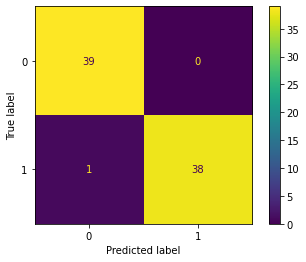

In [650]:
# Multiclass
y_pred = model.predict_classes(X_test)
cm=confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 

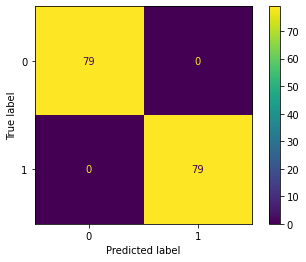

In [680]:
# Multiclass
y_pred = model.predict_classes(X_train)
cm=confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 

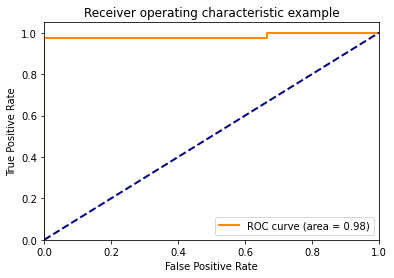

In [681]:
y_score=model.predict(X_test)

from sklearn.metrics import roc_curve, auc


fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

TRAIN: [   1    3    4 ... 1337 1338 1339] TEST: [   0    2    8   12   14   22   25   37   38   44   51   62   63   64
   67   80   89   90   98  104  106  113  114  119  120  125  132  138
  140  143  147  149  155  158  161  166  173  177  183  184  190  201
  205  206  223  228  232  233  242  245  247  250  253  257  258  262
  267  272  275  280  282  288  299  300  305  309  311  312  313  315
  317  319  320  325  333  336  340  342  343  348  353  366  373  375
  378  383  396  399  401  402  406  419  423  428  431  448  462  463
  467  470  474  479  499  501  505  506  511  528  534  535  538  545
  547  548  550  555  585  595  596  599  605  609  611  613  620  632
  651  652  653  655  657  658  678  679  682  685  699  702  703  707
  711  717  718  723  730  736  743  745  749  754  764  772  775  788
  791  797  806  809  821  824  826  829  833  837  841  842  843  847
  851  852  855  860  861  866  869  870  872  875  876  879  886  887
  890  901  907  912  913  9

36/36 [==============================] - 1s 22ms/step - loss: 0.1569 - precision_96: 0.9385
Epoch 13/40
36/36 [==============================] - 1s 22ms/step - loss: 0.1590 - precision_96: 0.9273
Epoch 14/40
36/36 [==============================] - 1s 22ms/step - loss: 0.1583 - precision_96: 0.9320
Epoch 15/40
36/36 [==============================] - 1s 22ms/step - loss: 0.1599 - precision_96: 0.9357
Epoch 16/40
36/36 [==============================] - 1s 21ms/step - loss: 0.1322 - precision_96: 0.9366
Epoch 17/40
36/36 [==============================] - 1s 21ms/step - loss: 0.1141 - precision_96: 0.9497
Epoch 18/40
36/36 [==============================] - 1s 21ms/step - loss: 0.1122 - precision_96: 0.9515
Epoch 19/40
36/36 [==============================] - 1s 21ms/step - loss: 0.0979 - precision_96: 0.9562
Epoch 20/40
36/36 [==============================] - 1s 21ms/step - loss: 0.0775 - precision_96: 0.9655
Epoch 21/40
36/36 [==============================] - 1s 21ms/step - loss: 0.

36/36 [==============================] - 1s 21ms/step - loss: 0.0210 - precision_97: 0.9925
Epoch 37/40
36/36 [==============================] - 1s 21ms/step - loss: 0.0296 - precision_97: 0.9897
Epoch 38/40
36/36 [==============================] - 1s 21ms/step - loss: 0.0670 - precision_97: 0.9776
Epoch 39/40
36/36 [==============================] - 1s 21ms/step - loss: 0.1149 - precision_97: 0.9571
Epoch 40/40
36/36 [==============================] - 1s 21ms/step - loss: 0.0673 - precision_97: 0.9748
TRAIN: [   0    1    2 ... 1338 1339 1340] TEST: [   5   13   16   17   23   29   39   58   72   78   82   84   88   91
  105  108  116  123  134  141  146  148  150  157  164  167  169  171
  179  189  191  199  213  215  216  219  226  230  231  235  237  238
  243  246  251  254  259  266  268  269  276  283  284  287  297  302
  316  322  323  329  332  334  339  341  350  359  364  365  367  372
  382  389  390  393  394  397  407  410  411  432  435  440  444  447
  455  457  458  

36/36 [==============================] - 1s 21ms/step - loss: 0.2116 - precision_99: 0.9180
Epoch 8/40
36/36 [==============================] - 1s 21ms/step - loss: 0.2115 - precision_99: 0.9152
Epoch 9/40
36/36 [==============================] - 1s 21ms/step - loss: 0.1848 - precision_99: 0.9273
Epoch 10/40
36/36 [==============================] - 1s 21ms/step - loss: 0.1895 - precision_99: 0.9208
Epoch 11/40
36/36 [==============================] - 1s 22ms/step - loss: 0.1772 - precision_99: 0.9264
Epoch 12/40
36/36 [==============================] - 1s 22ms/step - loss: 0.1756 - precision_99: 0.9217
Epoch 13/40
36/36 [==============================] - 1s 21ms/step - loss: 0.1904 - precision_99: 0.9180
Epoch 14/40
36/36 [==============================] - 1s 21ms/step - loss: 0.1512 - precision_99: 0.9338
Epoch 15/40
36/36 [==============================] - 1s 21ms/step - loss: 0.1354 - precision_99: 0.9413
Epoch 16/40
36/36 [==============================] - 1s 22ms/step - loss: 0.12

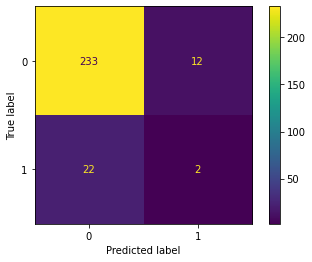

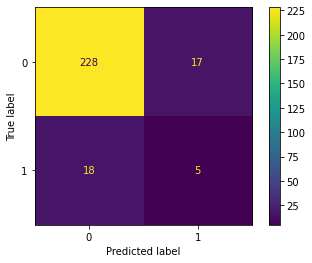

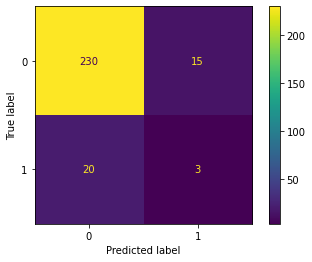

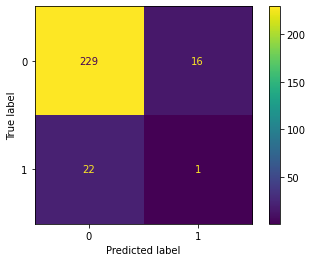

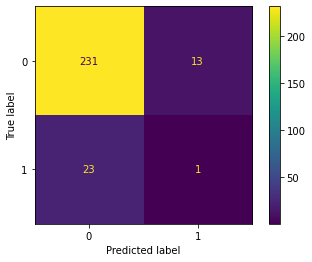

In [534]:
import random as rn


tf.random.set_seed(89)
rn.seed(1254)
np.random.seed(37)

encoder=LabelEncoder()
encoder.fit(y1)
encoded_y=encoder.transform(y1)
dummy_y=np_utils.to_categorical(encoded_y)


from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,random_state=7,shuffle=True)
k=1
for train_index, test_index in skf.split(d, y1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = d[train_index], d[test_index]
    y_train, y_test = dummy_y[train_index], dummy_y[test_index]
    
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.SimpleRNN(256,input_shape=[d.shape[1],d.shape[2]],return_sequences=True))
    model.add(tf.keras.layers.Dropout(rate=0.3))
    model.add(tf.keras.layers.SimpleRNN(64))
    model.add(tf.keras.layers.Dense(2,activation="softmax"))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=[tf.keras.metrics.Precision()])
    model.fit(X_train,y_train,epochs=40,batch_size=30)
  
    l=[]
    for i in y_test:
        l.append(np.argmax(i))
    k=np.array(l)

    # Multiclass
    y_pred = model.predict_classes(X_test)
    cm=confusion_matrix(k, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
    disp.plot() 
    
    
    

In [689]:
d=pd.read_csv("missing_request_test.csv")
d.drop(columns=["Unnamed: 0"],inplace=True)
print(d.label.value_counts())

d1=d.drop(columns=['Type', 'timesensitive', 'client_min',
       'client_max', 'client_resendMin', 'client_resendMax', 'errorRate',
       'server_min', 'server_max', 'client_mac', 'client_ip',
       'client_send_port', 'client_rec_port', 'server_mac', 'server_ip',
       'server_send_port', 'server_rec_port'])

packets_dum=pd.get_dummies(d1, columns=[ 'msg_type', 'iface_ver', 'proto_ver', 'retcode',
       'ip_src', 'ip_dst', 'proto', 'sport', 'dport', 'mac_src', 'mac_dst',
       'service_id', 'method_id','Client_id'])


#packets_dum.drop(columns=["iface_ver_3","retcode_10","ip_src_10.1.0.9","mac_src_02:9b:bb:bb:bb:bb"],inplace=True)

packets_dum["Label"]=packets_dum["label"]

packets_dum.drop(columns="label",inplace=True)
packets_dum.head()

X=packets_dum.iloc[:,0:-1]
y=packets_dum.iloc[:,-1]

X=X.astype(float)
X=X.to_numpy()
y=y.astype(int)
y=y.to_numpy()

print(X.shape)

count=0
window=16
value=window-1
total=X.shape[0]

for i in range(total):
    if(i+value<total):
        count+=1
        
print(count)

d1=np.zeros((count,window,X.shape[1]),dtype='float')
for i in range(d1.shape[0]):
    d1[i]=X[i:i+window].astype(float)
    
    
y2=np.zeros((count,1),dtype='uint8')
for i in range(d1.shape[0]):
    y2[i]=y[i+window-1]


index_majority=np.where(y2==0)
index_minority=np.where(y2==1)

from sklearn.utils import resample
X1_majority=np.zeros((len(np.where(y2==0)[0]),window,d1.shape[2]))
count=0
for i in index_majority[0]:
    X1_majority[count]=d1[i]
    count+=1
count=0
X1_minority=np.zeros((len(np.where(y2==1)[0]),window,d1.shape[2]))
for i in index_minority[0]:
    X1_minority[0]=d1[i]
    count+=1
    
X1_normal=resample(X1_majority,replace=False,n_samples=len(X1_minority),random_state=123)
    
X1_total=np.concatenate((X1_normal,X1_minority),axis=0)
Y1_total=np.concatenate((np.zeros((len(X1_normal),1)),np.ones((len(X1_minority),1))))

0    1292
1     115
Name: label, dtype: int64
(1407, 96)
1392


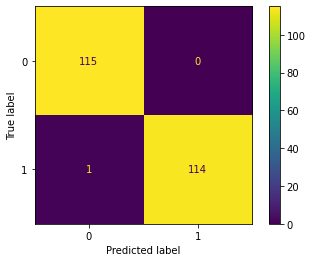

In [691]:
y_pred = model.predict_classes(X1_total)
cm=confusion_matrix(Y1_total, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 

In [699]:
d1[2]

array([[ 2., 14.,  0., ...,  0.,  1.,  0.],
       [ 2., 24.,  0., ...,  0.,  0.,  0.],
       [ 2., 21.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 2., 10.,  1., ...,  0.,  0.,  0.],
       [ 2., 26.,  1., ...,  0.,  0.,  0.],
       [ 1., 15.,  0., ...,  0.,  0.,  0.]])

In [715]:
d1[38].reshape(1,-1).shape

(1, 1536)

In [709]:
test=d1[38].reshape((1,16,96))

In [712]:
model.predict(test)

array([[1.3970559e-05]], dtype=float32)

In [698]:
np.where(y2==1)

(array([   2,   19,   38,   57,   58,   69,   74,   76,   81,   86,  105,
         109,  117,  121,  133,  134,  145,  155,  166,  179,  181,  206,
         215,  220,  223,  225,  237,  251,  252,  259,  273,  297,  348,
         386,  391,  423,  427,  441,  446,  450,  453,  470,  472,  498,
         514,  528,  531,  549,  554,  608,  661,  664,  678,  688,  699,
         709,  711,  713,  714,  716,  724,  732,  750,  755,  773,  802,
         827,  851,  863,  874,  877,  921,  930,  936,  964,  975,  990,
         992, 1002, 1009, 1045, 1075, 1078, 1089, 1119, 1143, 1161, 1166,
        1183, 1184, 1186, 1196, 1209, 1238, 1246, 1260, 1283, 1285, 1286,
        1308, 1310, 1313, 1317, 1319, 1327, 1329, 1330, 1336, 1341, 1351,
        1367, 1378, 1382, 1385, 1388], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [693]:
X1_total[0]

array([[ 9., 22.,  0., ...,  0.,  0.,  0.],
       [13.,  9.,  0., ...,  0.,  0.,  1.],
       [ 9.,  9.,  0., ...,  0.,  0.,  0.],
       ...,
       [10., 26.,  0., ...,  0.,  0.,  0.],
       [10.,  8.,  0., ...,  1.,  0.,  0.],
       [11., 15.,  1., ...,  0.,  0.,  0.]])

In [695]:
for i in X1_total[0]:
    print(i[0])

9.0
13.0
9.0
3.0
24.0
13.0
25.0
10.0
13.0
10.0
9.0
11.0
3.0
10.0
10.0
11.0


C:\Users\natashakhatib\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


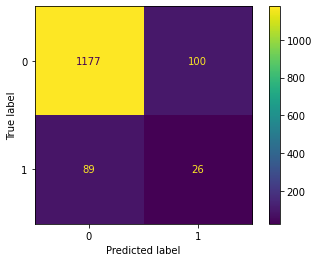

In [550]:
encoder=LabelEncoder()
encoder.fit(y2)
encoded_y=encoder.transform(y2)
dummy_y=np_utils.to_categorical(encoded_y)


l=[]
for i in dummy_y:
    l.append(np.argmax(i))
k=np.array(l)

# Multiclass
y_pred = model.predict_classes(d1)
cm=confusion_matrix(k, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 

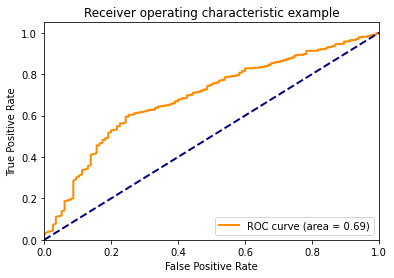

In [461]:
y_score=model.predict(d1)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(dummy_y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [462]:
d

,msg_type,session_id,iface_ver,length,proto_ver,retcode,ip_src,ip_dst,proto,sport,...,Client_id,client_mac,client_ip,client_send_port,client_rec_port,server_mac,server_ip,server_send_port,server_rec_port,label
0,0,1,1,14,1,0,10.1.0.1,10.0.0.1,17,30501,...,1,02:1B:BB:BB:BB:BB,10.1.0.1,30501,30501,02:1A:AA:AA:AA:AA,10.0.0.1,30491,30491,0
1,2,2,1,26,1,0,10.1.0.8,10.0.0.2,17,30501,...,8,02:8B:BB:BB:BB:BB,10.1.0.8,30501,30501,02:2A:AA:AA:AA:AA,10.0.0.2,30491,30491,0
2,2,2,1,14,1,0,10.1.0.7,10.0.0.4,17,30501,...,7,02:7B:BB:BB:BB:BB,10.1.0.7,30501,30501,02:4A:AA:AA:AA:AA,10.0.0.4,30491,30491,0
3,1,2,1,24,1,0,10.1.0.2,10.0.0.1,17,30501,...,2,02:2B:BB:BB:BB:BB,10.1.0.2,30501,30501,02:1A:AA:AA:AA:AA,10.0.0.1,30491,30491,0
4,1,2,1,21,1,0,10.1.0.5,10.0.0.1,17,30501,...,5,02:5B:BB:BB:BB:BB,10.1.0.5,30501,30501,02:1A:AA:AA:AA:AA,10.0.0.1,30491,30491,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,128,49,1,8,1,0,10.0.0.2,10.1.0.4,17,30491,...,4,02:4B:BB:BB:BB:BB,10.1.0.4,30501,30501,02:2A:AA:AA:AA:AA,10.0.0.2,30491,30491,0
1403,128,49,1,11,1,0,10.0.0.2,10.1.0.7,17,30491,...,7,02:7B:BB:BB:BB:BB,10.1.0.7,30501,30501,02:2A:AA:AA:AA:AA,10.0.0.2,30491,30491,1
1404,0,50,1,21,1,0,10.1.0.4,10.0.0.1,17,30501,...,4,02:4B:BB:BB:BB:BB,10.1.0.4,30501,30501,02:1A:AA:AA:AA:AA,10.0.0.1,30491,30491,0
1405,128,50,1,10,1,0,10.0.0.2,10.1.0.4,17,30491,...,4,02:4B:BB:BB:BB:BB,10.1.0.4,30501,30501,02:2A:AA:AA:AA:AA,10.0.0.2,30491,30491,0


In [463]:
y_test=dummy_y

<ipython-input-464-30af656b8708>:14: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


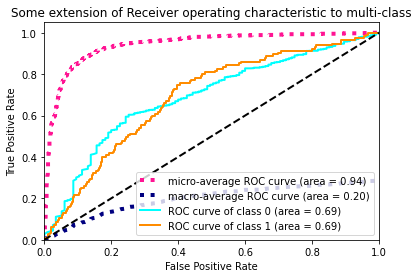

In [464]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

from scipy import interp
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 7

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

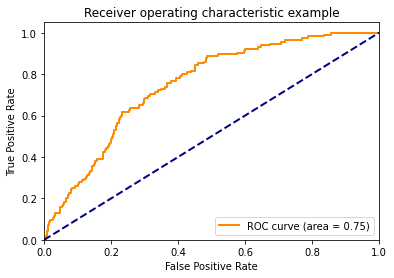

In [551]:
y_score=model.predict(d1)

from sklearn.metrics import roc_curve, auc


fpr, tpr, _ = roc_curve(y2, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Data Imbalance

In [896]:
d=pd.read_csv("missing_request9.csv")
d.drop(columns=["Unnamed: 0"],inplace=True)
print(d.label.value_counts())

d1=d.drop(columns=['Type', 'timesensitive', 'client_min',
       'client_max', 'client_resendMin', 'client_resendMax', 'errorRate',
       'server_min', 'server_max', 'client_mac', 'client_ip',
       'client_send_port', 'client_rec_port', 'server_mac', 'server_ip',
       'server_send_port', 'server_rec_port'])

packets_dum=pd.get_dummies(d1, columns=[ 'msg_type', 'iface_ver', 'proto_ver', 'retcode',
       'ip_src', 'ip_dst', 'proto', 'sport', 'dport', 'mac_src', 'mac_dst',
       'service_id', 'method_id','Client_id'])


#packets_dum.drop(columns=["iface_ver_3","retcode_10","ip_src_10.1.0.9","mac_src_02:9b:bb:bb:bb:bb"],inplace=True)

packets_dum["Label"]=packets_dum["label"]

packets_dum.drop(columns="label",inplace=True)
packets_dum.head()

X=packets_dum.iloc[:,0:-1]
y=packets_dum.iloc[:,-1]

X=X.astype(float)
X=X.to_numpy()
y=y.astype(int)
y=y.to_numpy()

print(X.shape)

count=0
window=16
value=window-1
total=X.shape[0]

for i in range(total):
    if(i+value<total):
        count+=1
        
print(count)

d1=np.zeros((count,window,X.shape[1]),dtype='float')
for i in range(d1.shape[0]):
    d1[i]=X[i:i+window].astype(float)
    
    
y2=np.zeros((count,1),dtype='uint8')
for i in range(d1.shape[0]):
    y2[i]=y[i+window-1]

index_minority=np.where(y2==1)

count=0
X1_minority=np.zeros((len(np.where(y2==1)[0]),window,d1.shape[2]))
for i in index_minority[0]:
    X1_minority[count]=d1[i]
    count+=1
    
#print(X1_minority)


index_majority=np.where(y2==0)

count=0
X1_majority=np.zeros((len(np.where(y2==0)[0]),window,d1.shape[2]))
for i in index_majority[0]:
    X1_majority[count]=d1[i]
    count+=1
    
#print(X1_majority)

Xmax=resample(X1_majority,replace=False,n_samples=len(X1_minority),random_state=123)

0    1274
1     118
Name: label, dtype: int64
(1392, 96)
1377


In [867]:
Xmin1=X1_minority
Xmax1=Xmax

In [869]:
Xmin2=X1_minority
Xmax2=Xmax

In [873]:
Xmin3=X1_minority
Xmax3=Xmax

In [875]:
Xmin4=X1_minority
Xmax4=Xmax

In [877]:
Xmin5=X1_minority
Xmax5=Xmax

In [879]:
Xmin6=X1_minority
Xmax6=Xmax

In [897]:
Xmin7=X1_minority
Xmax7=Xmax

# Abnormal Classes

In [898]:
X_abnormal=np.concatenate((Xmin1,Xmin2,Xmin3,Xmin4,Xmin5,Xmin6,Xmin7))
Y_abnormal=np.ones((len(X_abnormal),1))

In [899]:
X_abnormal.shape

(762, 16, 96)

In [900]:
X_normal=np.concatenate((Xmax1,Xmax2,Xmax3,Xmax4,Xmax5,Xmax6,Xmax7))
Y_normal=np.zeros((len(X_normal),1))

In [901]:
X_normal.shape

(762, 16, 96)

In [902]:
len(X_abnormal)/((len(X_normal)+len(X_abnormal)))

0.5

In [903]:
X_total=np.concatenate((X_normal,X_abnormal))
Y_total=np.concatenate((Y_normal,Y_abnormal))


Epoch 1/30
61/61 [==============================] - 2s 30ms/step - loss: 0.6886 - val_loss: 0.6712
Epoch 2/30
61/61 [==============================] - 1s 18ms/step - loss: 0.6133 - val_loss: 0.5434
Epoch 3/30
61/61 [==============================] - 1s 16ms/step - loss: 0.4876 - val_loss: 0.4690
Epoch 4/30
61/61 [==============================] - 1s 17ms/step - loss: 0.4548 - val_loss: 0.4492
Epoch 5/30
61/61 [==============================] - 1s 17ms/step - loss: 0.4295 - val_loss: 0.4474
Epoch 6/30
61/61 [==============================] - 1s 17ms/step - loss: 0.4191 - val_loss: 0.4490
Epoch 7/30
61/61 [==============================] - 1s 18ms/step - loss: 0.4237 - val_loss: 0.4550
Epoch 8/30
61/61 [==============================] - 1s 18ms/step - loss: 0.4131 - val_loss: 0.4566
Epoch 9/30
61/61 [==============================] - 1s 17ms/step - loss: 0.4174 - val_loss: 0.4406
Epoch 10/30
61/61 [==============================] - 1s 17ms/step - loss: 0.4132 - val_loss: 0.4714
Epoch 11/

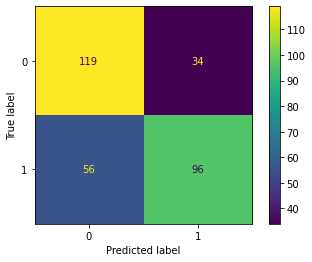

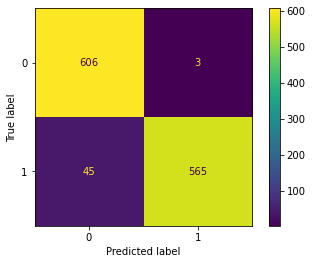

In [904]:
X_train, X_test, y_train, y_test = train_test_split(X_total, Y_total, test_size=0.2, random_state=42,stratify=Y_total)
import random as rn 


model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=[X_train.shape[1],X_train.shape[2]],return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))
model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(X_train,y_train,epochs=30,batch_size=20,validation_data=(X_test,y_test))

# Multiclass
y_pred = model.predict_classes(X_test)
cm=confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 

# Multiclass
y_pred = model.predict_classes(X_train)
cm=confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 

TRAIN: [   0    1    2 ... 1521 1522 1523] TEST: [   6   19   22   24   25   34   37   47   54   68   72   76   81   84
   88  109  115  121  125  128  130  131  134  136  137  146  163  166
  172  175  176  191  192  196  199  203  207  208  213  216  221  222
  228  229  231  237  238  241  242  257  259  261  264  274  284  287
  289  291  301  305  309  310  323  325  327  328  337  342  343  351
  353  356  358  359  361  371  373  380  382  391  392  394  399  406
  410  412  423  424  426  427  431  436  440  441  450  451  465  474
  475  489  495  503  504  505  506  509  512  513  515  524  526  543
  550  552  553  563  566  567  577  583  598  604  606  610  620  624
  638  639  646  650  653  656  666  667  675  682  685  689  691  692
  695  696  698  706  707  720  723  731  733  736  738  740  744  764
  766  773  783  796  804  806  809  810  811  812  827  828  830  831
  834  838  846  847  848  871  881  896  905  906  908  911  912  913
  918  920  925  932  933  9

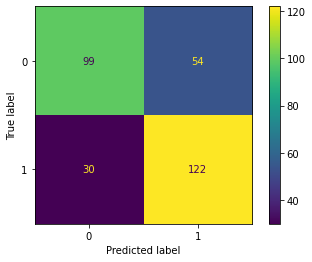

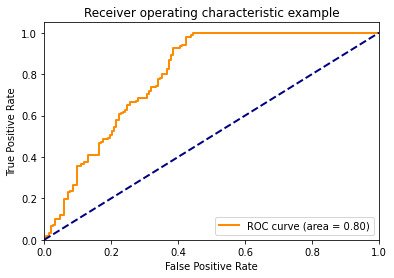

TRAIN: [   1    3    4 ... 1521 1522 1523] TEST: [   0    2    5   13   18   20   30   32   38   40   48   49   67   71
   95   97  102  106  110  114  118  124  141  145  157  158  159  165
  178  189  193  198  201  210  211  214  219  223  226  230  233  236
  239  240  244  248  249  260  265  266  277  283  294  302  308  311
  314  315  317  322  329  331  336  338  339  340  349  352  367  379
  384  393  396  402  405  419  428  430  435  439  443  444  445  454
  456  460  462  464  467  469  470  471  472  476  477  481  484  490
  492  493  499  500  516  518  520  528  534  535  565  570  575  576
  580  584  588  592  596  597  600  601  611  612  618  622  626  628
  634  641  651  652  654  655  657  669  674  677  686  694  700  705
  712  719  721  727  729  730  732  739  745  753  756  760  761  763
  772  775  776  787  795  800  824  832  836  840  851  854  857  859
  862  865  869  870  873  874  878  885  888  893  894  902  903  909
  919  931  936  941  945  9

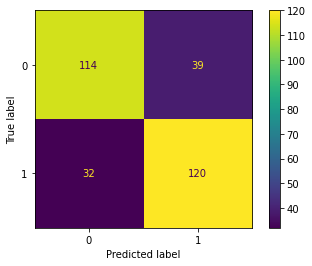

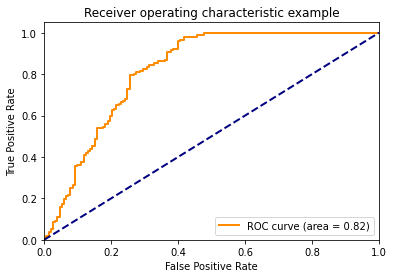

TRAIN: [   0    1    2 ... 1521 1522 1523] TEST: [   3    9   10   27   28   33   35   57   60   61   63   64   70   73
   78   82   87   90   91   98  111  122  138  142  151  152  154  156
  161  169  171  173  174  179  183  186  202  205  206  209  224  227
  234  235  245  247  250  252  262  275  280  281  282  285  286  288
  292  295  297  300  304  306  320  324  330  332  345  346  348  350
  354  357  365  369  375  376  377  378  386  387  389  390  395  398
  403  404  407  408  413  418  421  422  429  433  434  447  455  458
  459  478  482  485  486  488  494  496  498  510  514  529  531  536
  538  539  540  548  562  569  571  581  587  591  599  617  627  633
  636  637  647  661  665  668  673  676  681  690  693  703  709  710
  715  716  717  728  734  737  742  743  748  749  752  754  767  769
  771  781  786  790  794  799  803  814  819  823  829  833  839  841
  844  845  849  850  855  864  872  887  889  892  895  897  898  910
  915  916  921  922  926  9

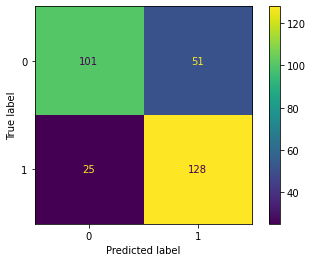

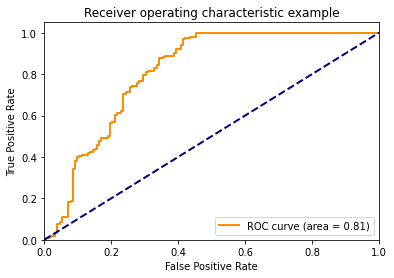

TRAIN: [   0    1    2 ... 1519 1520 1523] TEST: [   4    7    8   11   15   17   21   29   31   36   46   52   53   56
   65   66   69   74   75   79   85   86   94  100  101  105  108  113
  119  123  126  127  139  140  144  147  150  160  162  167  168  185
  187  190  200  204  215  217  225  246  253  263  269  270  272  273
  276  279  293  298  303  307  313  321  326  333  334  344  347  355
  364  366  372  381  383  385  401  409  411  414  415  416  417  420
  438  449  453  457  463  466  480  483  487  491  501  502  507  511
  517  519  521  525  532  537  542  544  549  551  558  559  564  568
  572  578  585  586  589  590  595  613  616  623  625  629  630  632
  640  642  644  648  658  664  670  671  672  684  697  702  711  713
  714  722  724  725  726  741  747  750  751  757  758  759  762  765
  768  785  788  789  797  802  805  807  815  818  821  826  835  843
  852  853  858  867  886  890  899  900  901  907  923  924  929  946
  951  953  960  962  967  9

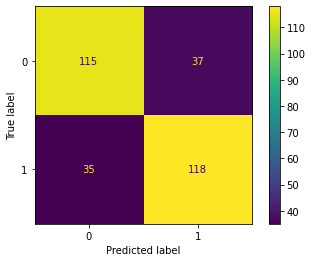

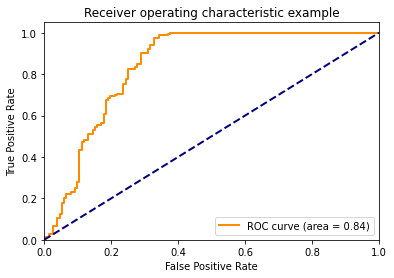

TRAIN: [   0    2    3 ... 1520 1521 1522] TEST: [   1   12   14   16   23   26   39   41   42   43   44   45   50   51
   55   58   59   62   77   80   83   89   92   93   96   99  103  104
  107  112  116  117  120  129  132  133  135  143  148  149  153  155
  164  170  177  180  181  182  184  188  194  195  197  212  218  220
  232  243  251  254  255  256  258  267  268  271  278  290  296  299
  312  316  318  319  335  341  360  362  363  368  370  374  388  397
  400  425  432  437  442  446  448  452  461  468  473  479  497  508
  522  523  527  530  533  541  545  546  547  554  555  556  557  560
  561  573  574  579  582  593  594  602  603  605  607  608  609  614
  615  619  621  631  635  643  645  649  659  660  662  663  678  679
  680  683  687  688  699  701  704  708  718  735  746  755  770  774
  777  778  779  780  782  784  791  792  793  798  801  808  813  816
  817  820  822  825  837  842  856  860  861  863  866  868  875  876
  877  879  880  882  883  8

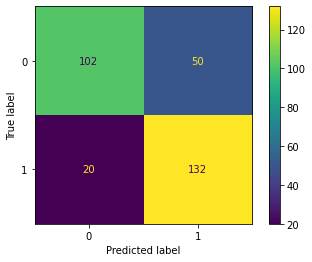

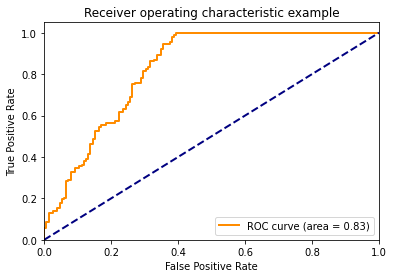

In [905]:
import random as rn


tf.random.set_seed(89)
rn.seed(1254)
np.random.seed(37)


from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,random_state=7,shuffle=True)
k=1
for train_index, test_index in skf.split(X_total, Y_total):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_total[train_index], X_total[test_index]
    y_train, y_test = Y_total[train_index], Y_total[test_index]
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(128,input_shape=[X_train.shape[1],X_train.shape[2]],return_sequences=True))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.LSTM(64))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(1,activation="sigmoid"))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    # Fit the model
    history=model.fit(X_train, y_train, epochs=20,batch_size=30)
    

    # Multiclass
    y_pred = model.predict_classes(X_test)
    cm=confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
    disp.plot() 
    
    y_score=model.predict(X_test)

    from sklearn.metrics import roc_curve, auc


    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
    

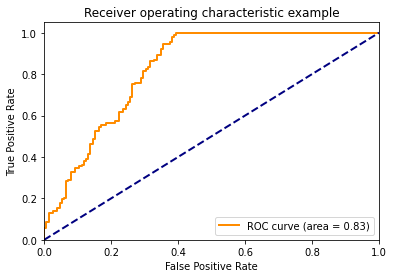

In [906]:
y_score=model.predict(X_test)

from sklearn.metrics import roc_curve, auc


fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

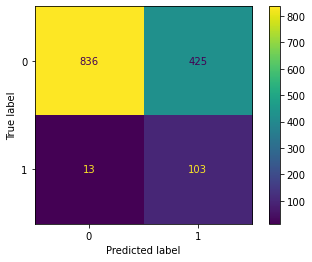

In [907]:
# Multiclass
y_pred = model.predict_classes(d1)
cm=confusion_matrix(y2, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 

In [908]:
model.predict(d1)

array([[0.00793299],
       [0.5200921 ],
       [0.0074231 ],
       ...,
       [0.86080706],
       [0.03170621],
       [0.9281576 ]], dtype=float32)

In [909]:
d=pd.read_csv("missing_request.csv")
d.drop(columns=["Unnamed: 0"],inplace=True)
print(d.label.value_counts())

d1=d.drop(columns=['Type', 'timesensitive', 'client_min',
       'client_max', 'client_resendMin', 'client_resendMax', 'errorRate',
       'server_min', 'server_max', 'client_mac', 'client_ip',
       'client_send_port', 'client_rec_port', 'server_mac', 'server_ip',
       'server_send_port', 'server_rec_port'])

packets_dum=pd.get_dummies(d1, columns=[ 'msg_type', 'iface_ver', 'proto_ver', 'retcode',
       'ip_src', 'ip_dst', 'proto', 'sport', 'dport', 'mac_src', 'mac_dst',
       'service_id', 'method_id','Client_id'])


#packets_dum.drop(columns=["iface_ver_3","retcode_10","ip_src_10.1.0.9","mac_src_02:9b:bb:bb:bb:bb"],inplace=True)

packets_dum["Label"]=packets_dum["label"]

packets_dum.drop(columns="label",inplace=True)
packets_dum.head()

X=packets_dum.iloc[:,0:-1]
y=packets_dum.iloc[:,-1]

X=X.astype(float)
X=X.to_numpy()
y=y.astype(int)
y=y.to_numpy()

print(X.shape)

count=0
window=16
value=window-1
total=X.shape[0]

for i in range(total):
    if(i+value<total):
        count+=1
        
print(count)

d1=np.zeros((count,window,X.shape[1]),dtype='float')
for i in range(d1.shape[0]):
    d1[i]=X[i:i+window].astype(float)
    
    
y2=np.zeros((count,1),dtype='uint8')
for i in range(d1.shape[0]):
    y2[i]=y[i+window-1]

index_minority=np.where(y2==1)

count=0
X1_minority=np.zeros((len(np.where(y2==1)[0]),window,d1.shape[2]))
for i in index_minority[0]:
    X1_minority[count]=d1[i]
    count+=1
    
#print(X1_minority)


index_majority=np.where(y2==0)

count=0
X1_majority=np.zeros((len(np.where(y2==0)[0]),window,d1.shape[2]))
for i in index_majority[0]:
    X1_majority[count]=d1[i]
    count+=1
    
X1_normal=resample(X1_majority,replace=False,n_samples=len(X1_minority),random_state=123)
    
X1_total=np.concatenate((X1_normal,X1_minority),axis=0)
Y1_total=np.concatenate((np.zeros((len(X1_normal),1)),np.ones((len(X1_minority),1))))

0    1266
1     118
Name: label, dtype: int64
(1384, 96)
1369


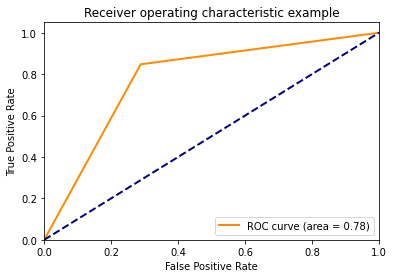

In [910]:
y_score=model.predict_classes(X1_total)

from sklearn.metrics import roc_curve, auc


fpr, tpr, _ = roc_curve(Y1_total, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()